In [1]:
pip install pandas matplotlib scikit-learn seaborn xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv('Database.csv')
# df = df.sample(1000)
df['TIMEOFDAY'] = pd.to_datetime(df['DATETIME']).dt.time.apply(lambda x: int(x.strftime("%H%M%S")))
df.drop(["RID", "DATETIME"], axis=1, inplace=True)
featureNames = ['GHI', 'DNI', 'DHI', 'TEMP', 'WINDSPEED', 'HUMIDITY']
targetName = 'SOLAR_PROD'
x = df[featureNames].copy()
y = df[targetName]
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

In [4]:
model = LinearRegression()

In [5]:
model.fit(X=xTrain, y=yTrain)

LinearRegression()

In [6]:
yPred = model.predict(xTest)

In [7]:
rmse = root_mean_squared_error(yTest, yPred)
mse = mean_squared_error(yTest, yPred)
mae = mean_absolute_error(yTest, yPred)
r2 = r2_score(yTest, yPred)

In [8]:
print(f"\nRoot Mean Squared Error: {rmse}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Root Mean Squared Error: 1451.566791596908
Mean Squared Error: 2107046.150466941
Mean Absolute Error: 960.4584985159204
R-squared: 0.8894408648495905


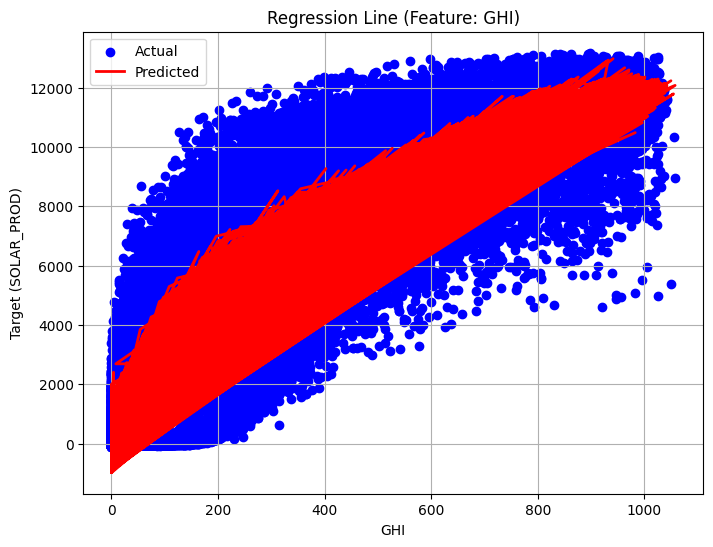

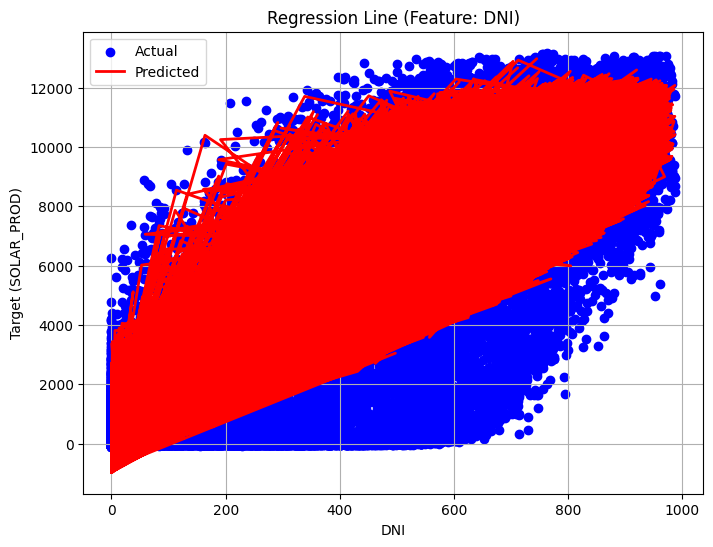

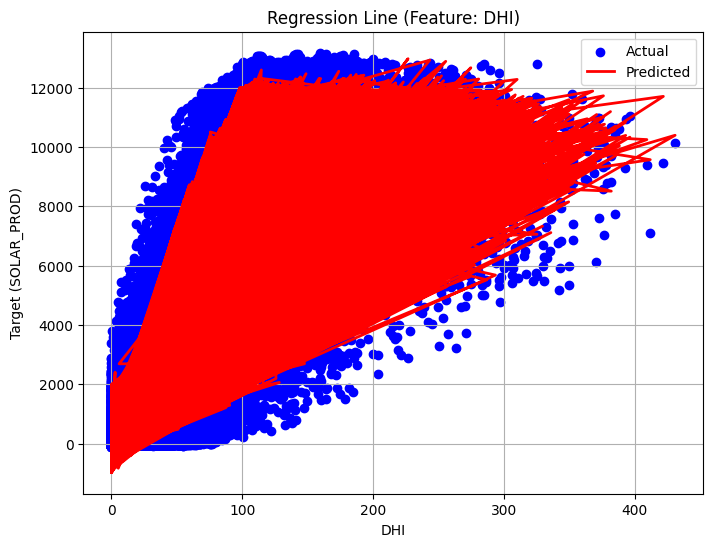

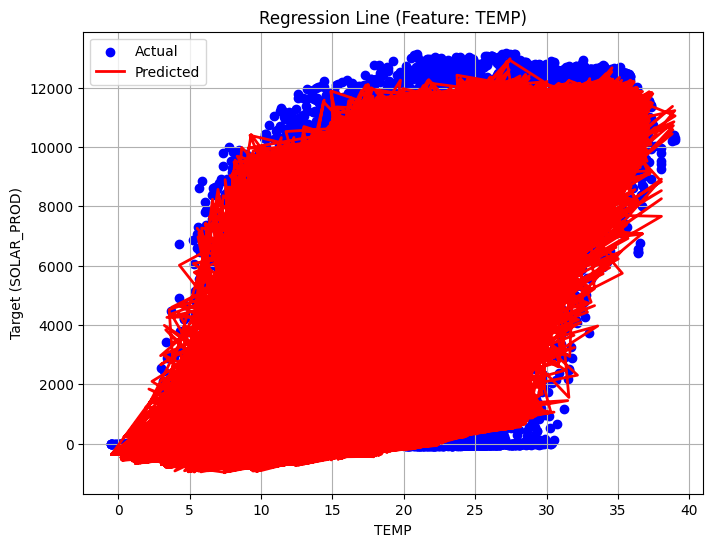

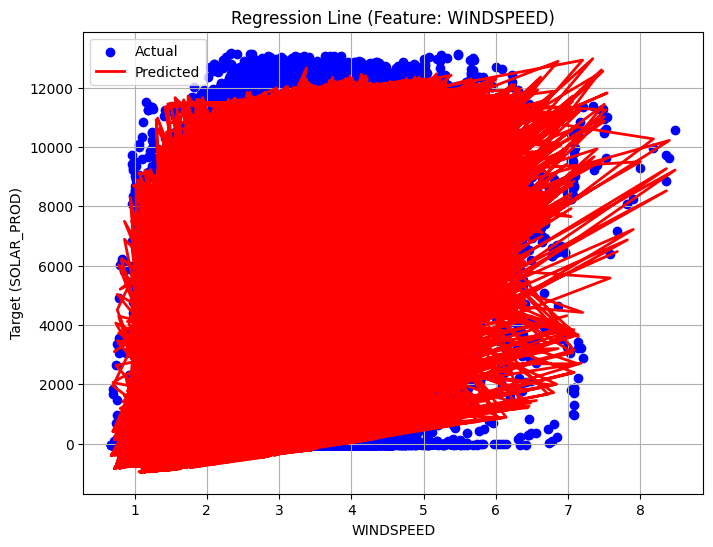

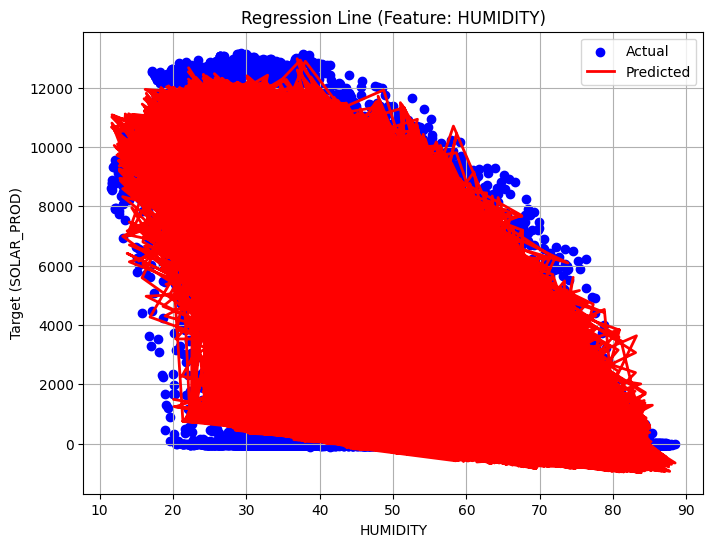

In [9]:
for featureName in featureNames:
    plt.figure(figsize=(8,6))
    plt.scatter(xTest[featureName], yTest, color='blue', label='Actual')
    plt.plot(xTest[featureName], yPred, color='red', linewidth=2, label='Predicted')
    plt.title(f'Regression Line (Feature: {featureName})')
    plt.xlabel(featureName)
    plt.ylabel(f'Target ({targetName})')
    plt.legend()
    plt.grid(True)
    plt.show()